In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import GridSearchCV

In [4]:
df = pd.read_csv('RUL.csv')
df.head()

,Unnamed: 0,unit,time_cycle,setting_1,setting_2,S2,S3,S4,S7,S8,S9,S11,S12,S13,S15,S17,S20,S21,RUL
0,0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187


In [5]:
df.drop(['Unnamed: 0'], axis = 1 , inplace = True )
df.head(5)

,unit,time_cycle,setting_1,setting_2,S2,S3,S4,S7,S8,S9,S11,S12,S13,S15,S17,S20,S21,RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,191
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,190
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,189
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,187


In [6]:
def scores_(y,x):
    print('MAE:', metrics.mean_absolute_error(y, x))
    print('MSE:', metrics.mean_squared_error(y, x))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y, x)))
    print('R2 Score:' ,metrics.r2_score(y,x))



# Train-Test Split

In [7]:
X = df.drop(['RUL'],axis=1)
y = df.RUL


In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [9]:
# FEATURE SCALING 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [10]:
params = {'alpha': (np.logspace(-8, 8, 100))} # It will check from 1e-08 to 1e+08
lasso = Lasso()
lasso_model = GridSearchCV(lasso, params, cv = 10)
lasso_model.fit(X_train, y_train)
print(lasso_model.best_params_)

{'alpha': 0.12915496650148853}


In [11]:
#fitting the hypertuned paramaters
lasso = lasso_model.best_estimator_
lasso.fit(X_train, y_train)
# TRAIN VS TEST SCORE
scores_(y_train,lasso.predict(X_train))
scores_(y_test,lasso.predict(X_test))

MAE: 30.33214581365653
MSE: 1556.2237087430492
RMSE: 39.44900136559922
R2 Score: 0.6720732766026019
MAE: 30.792425879773308
MSE: 1602.2511326821852
RMSE: 40.028129267830955
R2 Score: 0.6619166840130958


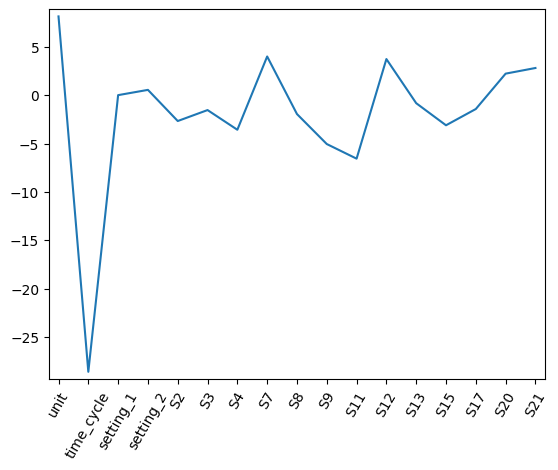

In [12]:
#LASSO COEFFICIENTS AND FEATURE IMPORTANCE
names = df.drop(['RUL'],axis=1)
# Plot the coefficients
plt.plot(range(len(names.columns)), lasso.coef_)
plt.xticks(range(len(names.columns)), names.columns.values, rotation=60)
plt.margins(0.02)
plt.show()

In [13]:
feature_importance = pd.DataFrame({
"features": names.columns,
"Coefficient": lasso.coef_})
feature_importance.sort_values(by="Coefficient", ascending=False)

,features,Coefficient
0,unit,8.144541
7,S7,4.000479
11,S12,3.734847
16,S21,2.809545
15,S20,2.225898
3,setting_2,0.547460
2,setting_1,0.003234
12,S13,-0.829889
14,S17,-1.431519
5,S3,-1.541552
